In [310]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy.stats import norm, beta
from sklearn import metrics
plt.style.use('seaborn-poster')
np.set_printoptions(precision=2)  # 2 digits after .

%matplotlib inline


# define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_40820/3150295963.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [311]:
# display user's activities history data
activities = pd.read_csv(USER_ACTIVITY_PATH)
activities.head()


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,sent_catalog_link,2020-02-04 20:19:00.110416
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
4,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646


In [312]:
activities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323893 entries, 0 to 323892
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           323893 non-null  object
 1   user_id           323893 non-null  object
 2   event_type        323893 non-null  object
 3   create_timestamp  323893 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


In [313]:
# display homes data
homes = pd.read_csv(HOME_DATA_PATH)
home_orig = homes.copy()

homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [314]:
homes.describe()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [315]:
homes.info()
homes_with_points=home_orig.copy()
homes_with_points["points"]=0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


In [316]:
# visualize missing value
missing_stats = {}
for col in homes.columns:
    if col =="item_id":
        continue
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")


'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 0.06% missing data with 3 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

<AxesSubplot: >

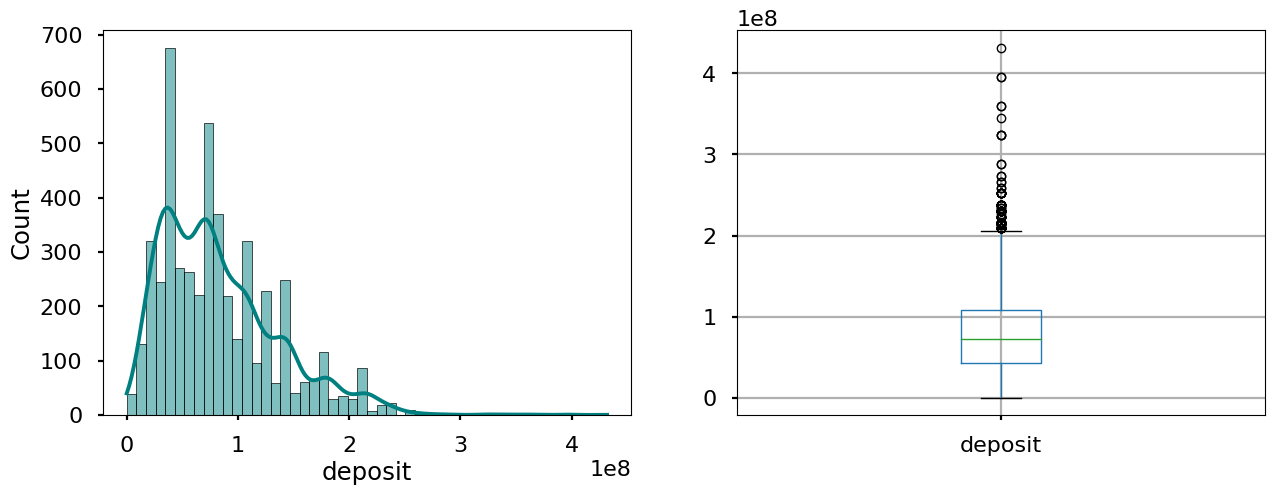

In [317]:
"""visualize deposit"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
deposit_data=homes[homes.deposit>0].deposit
sns.histplot(deposit_data, color='teal', kde=True, bins=50,ax=axes[0])
deposit_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

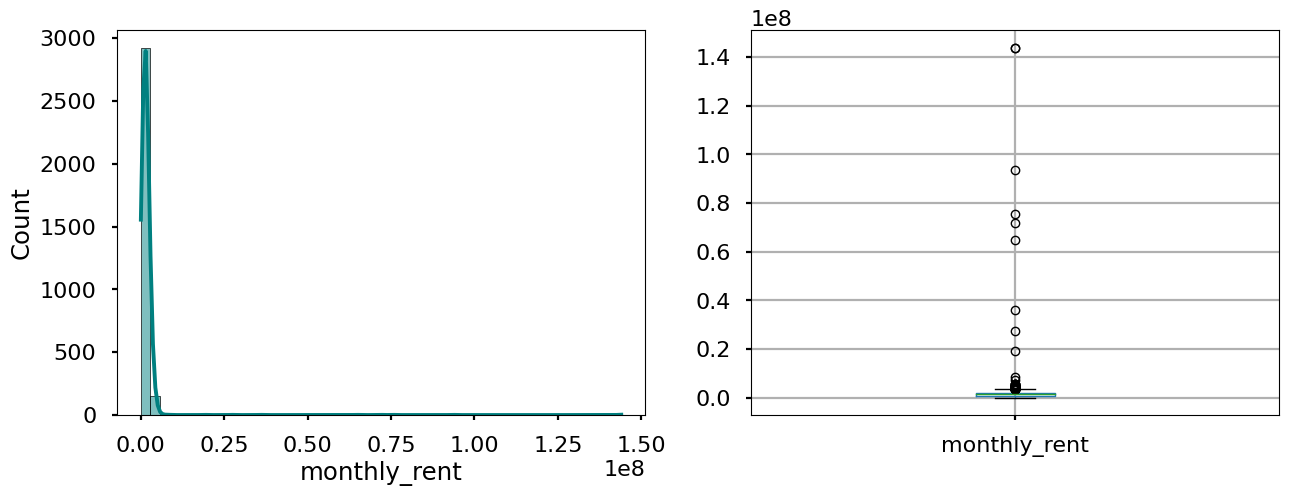

In [318]:
"""visualize monthly rent"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
monthly_rent_data=homes[homes.monthly_rent>0].monthly_rent
sns.histplot(monthly_rent_data, color='teal', kde=True, bins=50,ax=axes[0])
monthly_rent_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

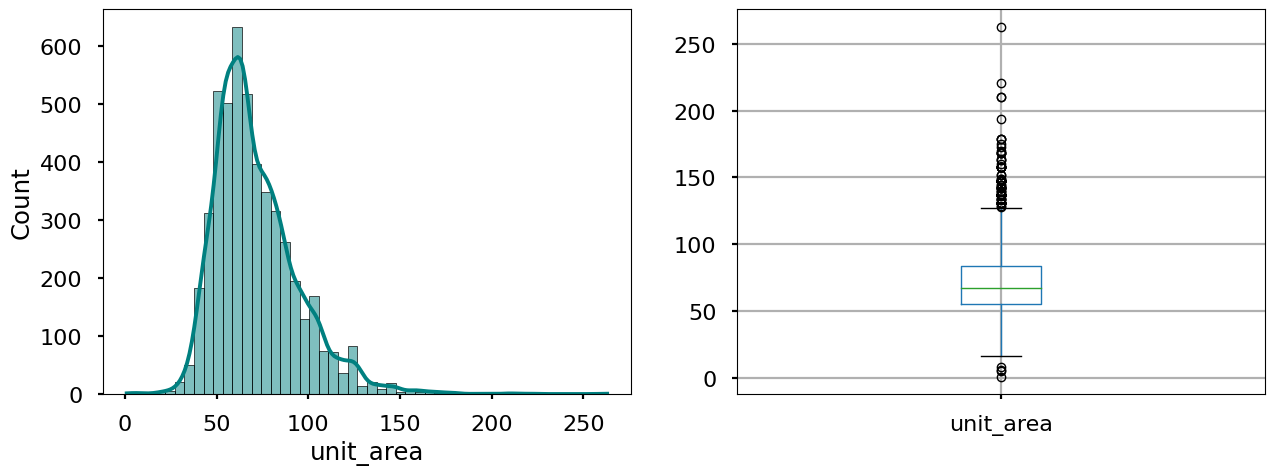

In [319]:
"""visualize unit area"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
unit_area_data=homes[homes.unit_area>0].unit_area
sns.histplot(unit_area_data, color='teal', kde=True, bins=50,ax=axes[0])
unit_area_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

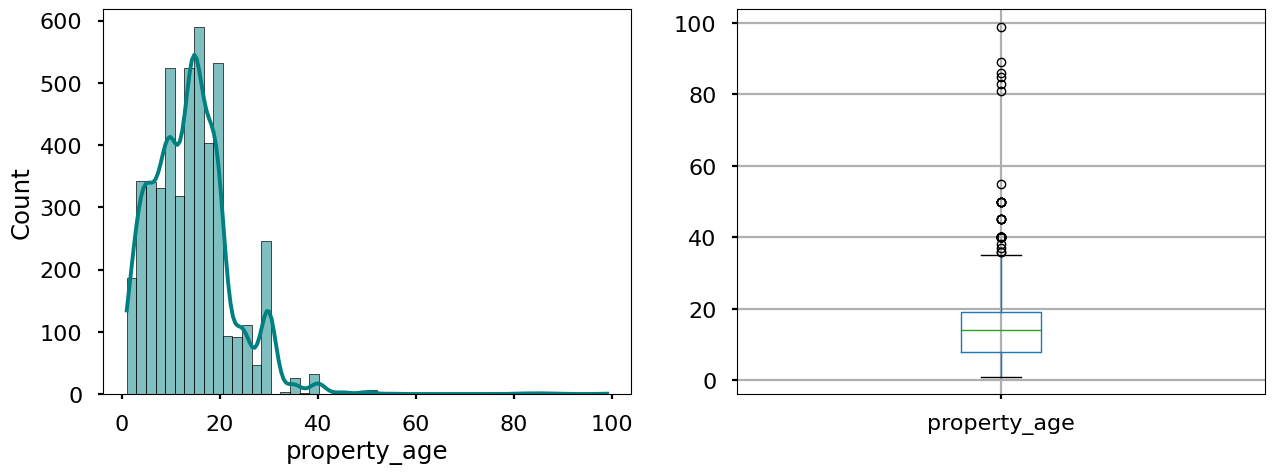

In [320]:
"""visualize property age"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
property_age_data=homes[homes.property_age>0].property_age
sns.histplot(property_age_data, color='teal', kde=True, bins=50,ax=axes[0])
property_age_data.to_frame().boxplot(vert=True,ax=axes[1])

/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_40820/3784418622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=homes.corr()


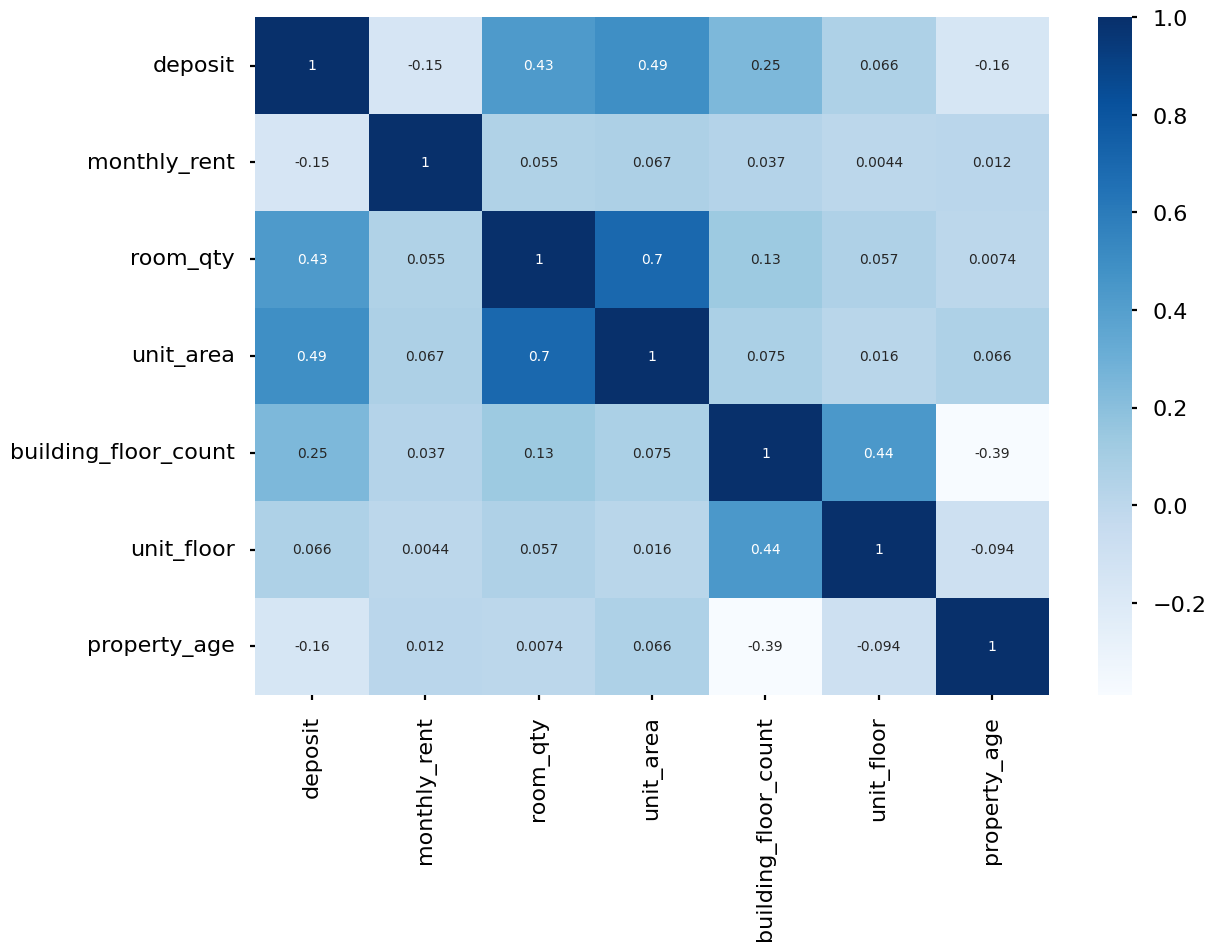

In [321]:
correlation=homes.corr()
sns.heatmap(data=correlation,annot=True,cmap="Blues")
plt.show()

In [322]:
# sanitize data
homes.drop(list(homes[homes.unit_area <=0].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()
orig_item_ids = homes["item_id"].values



In [323]:
from sklearn.preprocessing import *
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))
 
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,34,1.0,42,0,3.0,0.0,1,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,102,2.0,116,1,NaN,1.0,1,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,115,1.0,74,0,2.0,0.0,1,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,100,1.0,60,1,NaN,2.0,0,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,74,1.0,45,1,NaN,1.0,1,4.0


In [324]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats


['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [325]:

home_orig_cleaned = homes.copy()

del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,-0.349029,-0.277151,-1.332987,-0.816670,-1.299146,-0.734076,-9.289650e-01,-0.693991,0.717972,1.102223
1,-0.212798,0.860454,0.202577,0.911778,1.939700,1.322505,-8.499558e-16,-0.406897,0.717972,0.276448
2,-0.621491,0.102051,0.496140,-0.816670,0.101436,-0.734076,-1.885930e+00,-0.693991,0.717972,0.630352
3,-0.893953,-0.049630,0.157413,-0.816670,-0.511319,1.322505,-8.499558e-16,-0.119803,-1.368211,-0.903230
4,-1.030185,0.064130,-0.429715,-0.816670,-1.167842,1.322505,-8.499558e-16,-0.406897,0.717972,-1.139166


In [326]:


# remove rows that contains unused event
unused_events = [
    "seen_in_list",
    "suggest-new",
    "suggest_similar",
    "sent_catalog_link",
    # "visit_request-canceled",
    # "visit-canceled",
    # "meeting_request-canceled",
    # "meeting-canceled"
]

for event in unused_events:
    indexRows = activities[activities.event_type.str.contains(event)].index
    activities.drop(indexRows, inplace=True)
    activities.reset_index(drop=True, inplace=True)
display(activities.head())
#


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646
4,00062bc5-2535-4b1e-bbcb-228526c990b8,69c257cd-8033-82aa-8950-8804a03c2ed1,seen,2020-02-05 10:18:54.229749


In [327]:
from pandas import DataFrame
import os


def assign_weight():
    # assign weight to events
    events_weight={
    "seen":20,
    "visit_request-new":30,
    "visit-new":30,
    "visit-unsuccess":-10,
    "visit-success":50,
    "meeting_request-new":70,
    "meeting-new":70,
    "meeting-unsuccess":70,
    "meeting-success":100,
    "deal-success":100,
    "visit_request-canceled":-10,
    "visit-canceled":-15,
    "meeting_request-canceled":-30,
    "meeting-canceled":-40,
    }
    users_items_points={}

    for _, activity in activities.iterrows():
        user_id=activity.user_id
        item_id=activity.item_id
        event_type=activity.event_type
        key=user_id+"-"+item_id
        if users_items_points.get(key)==None: 
            users_items_points[key]={
               "user_id": user_id,
                "item_id":item_id,
                "points":0
            }
         
        users_items_points[key]["points"]+=events_weight[event_type]
    
    pointDf= DataFrame(users_items_points.values())

    pointDf.to_csv(USER_ITEM_POINT_PATH,index=False)

if not os.path.isfile(USER_ITEM_POINT_PATH):
    assign_weight()

pointDf=pd.read_csv(USER_ITEM_POINT_PATH)
display(pointDf.head(5))





,user_id,item_id,points
0,182aa519-83a8-848f-84a1-8697046d84c2,00062bc5-2535-4b1e-bbcb-228526c990b8,20
1,189a081a-ae0f-499d-9092-01758d93fa7f,00062bc5-2535-4b1e-bbcb-228526c990b8,40
2,69c257cd-8033-82aa-8950-8804a03c2ed1,00062bc5-2535-4b1e-bbcb-228526c990b8,20
3,054f4d81-ee93-407c-af31-ff84c3a103a8,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20
4,08a44ae5-8419-88dd-8c61-8a9cd391677c,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20


In [328]:
import functools as ft
house_by_points=pointDf.groupby("item_id").sum("points")
dfs=[homes_with_points,house_by_points]
temp=ft.reduce(lambda left,right:pd.merge(left,right,on="item_id"),dfs)
temp.head()

"""
deposit,point
property_age,point
room qty
monthly rent
"""


'\ndeposit,point\nproperty_age,point\nroom qty\nmonthly rent\n'

<AxesSubplot: xlabel='deposit', ylabel='room_qty'>

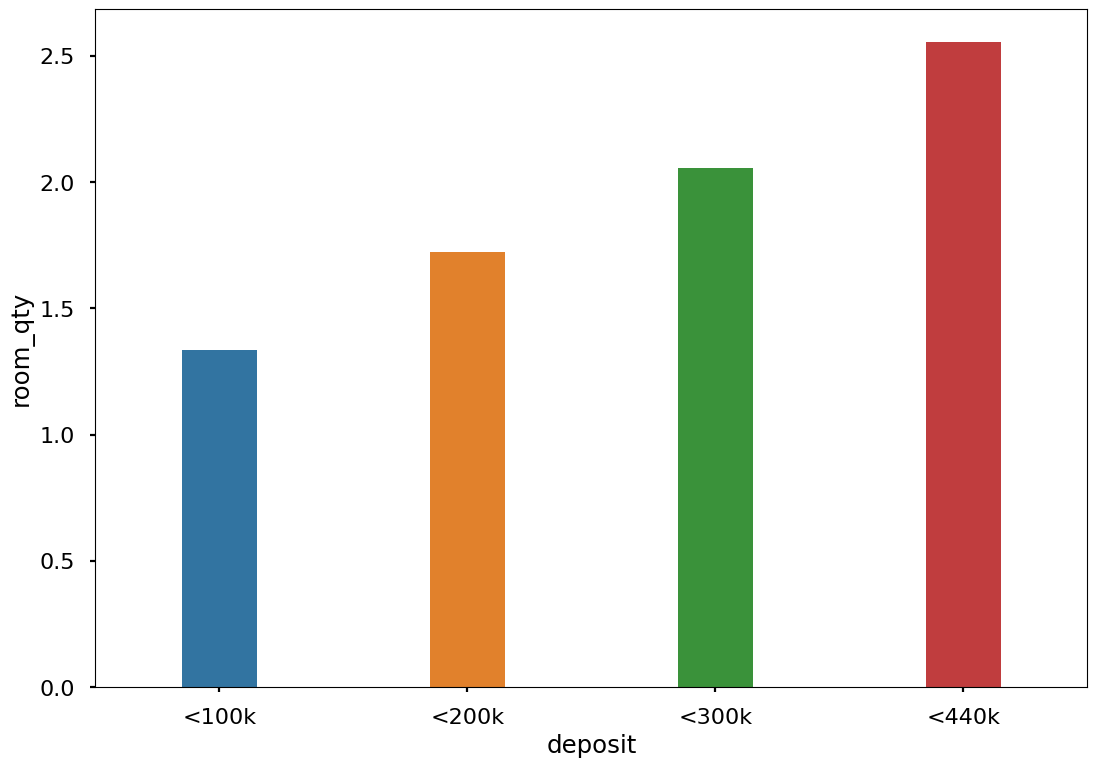

In [329]:
"""deposit - room_qty relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100k","<200k","<300k","<440k"])
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.room_qty,width=0.3)


<AxesSubplot: xlabel='deposit', ylabel='unit_area'>

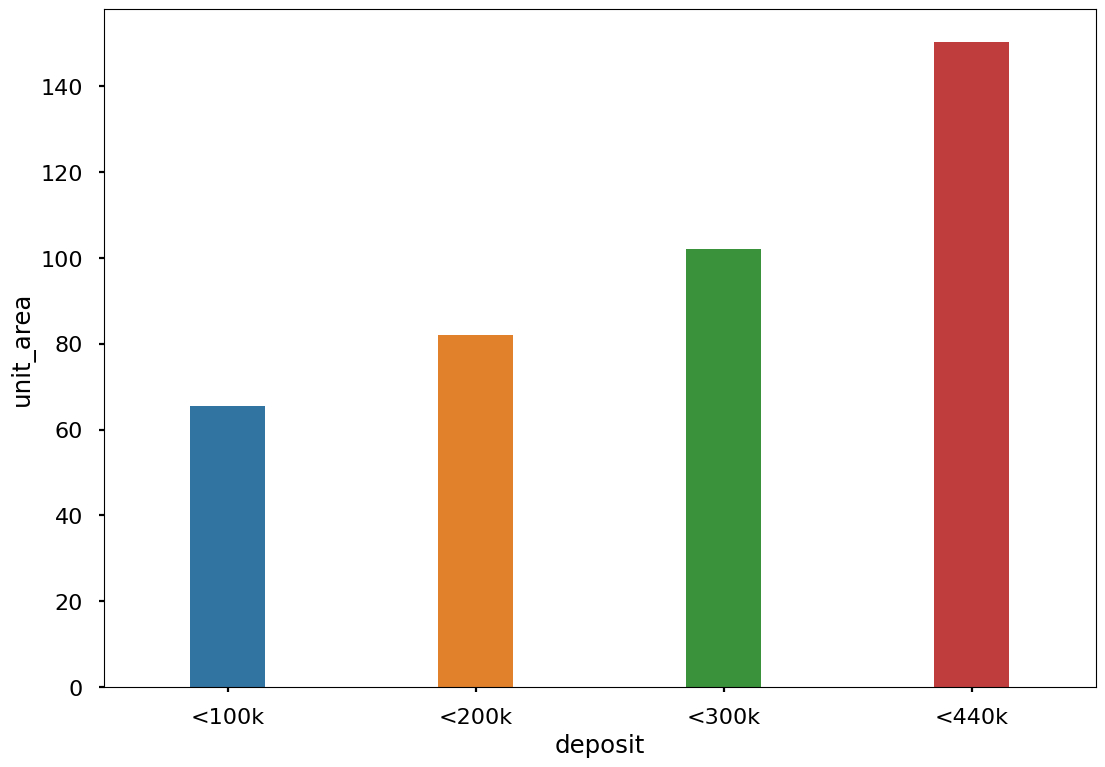

In [330]:
"""deposit - unit_area relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100k","<200k","<300k","<440k"])
deposit_room=home_orig.groupby(x)["unit_area"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.unit_area,width=0.3)


<AxesSubplot: xlabel='unit_area', ylabel='room_qty'>

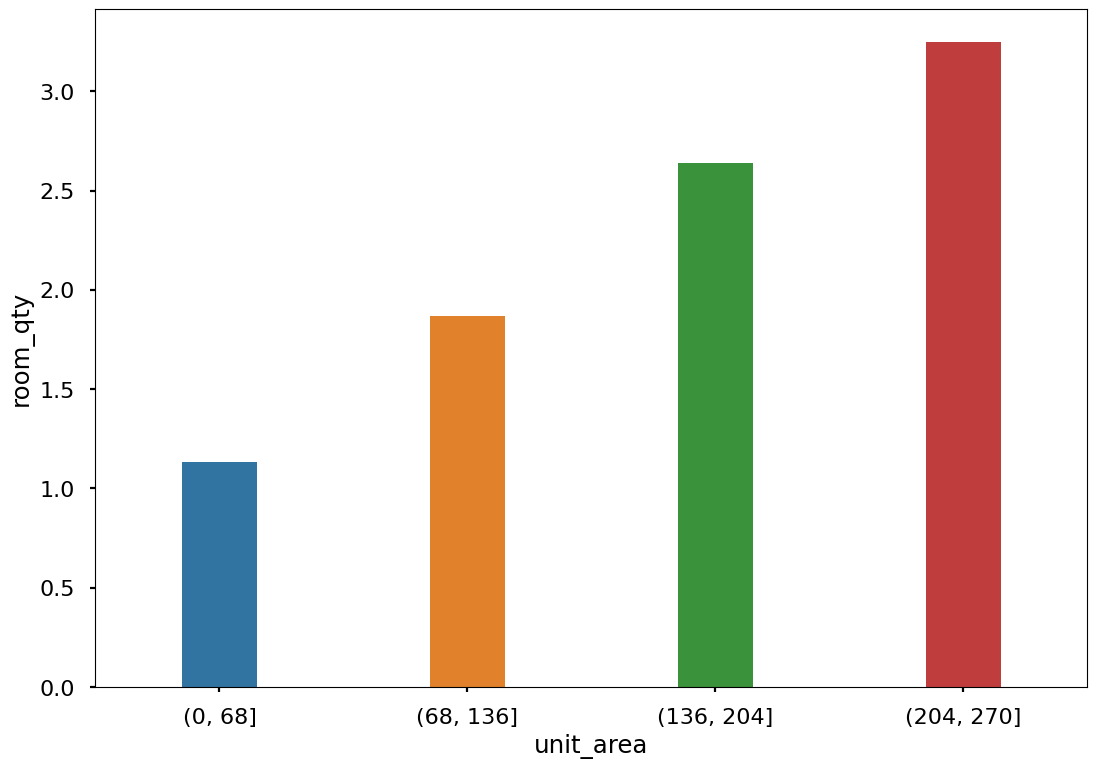

In [331]:
"""unit_area - room_qty relationship	"""

bins=[0,68,68*2,68*3,270]
x=pd.cut(x=home_orig.unit_area,bins=bins)
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.unit_area,y=deposit_room.room_qty,width=0.3)


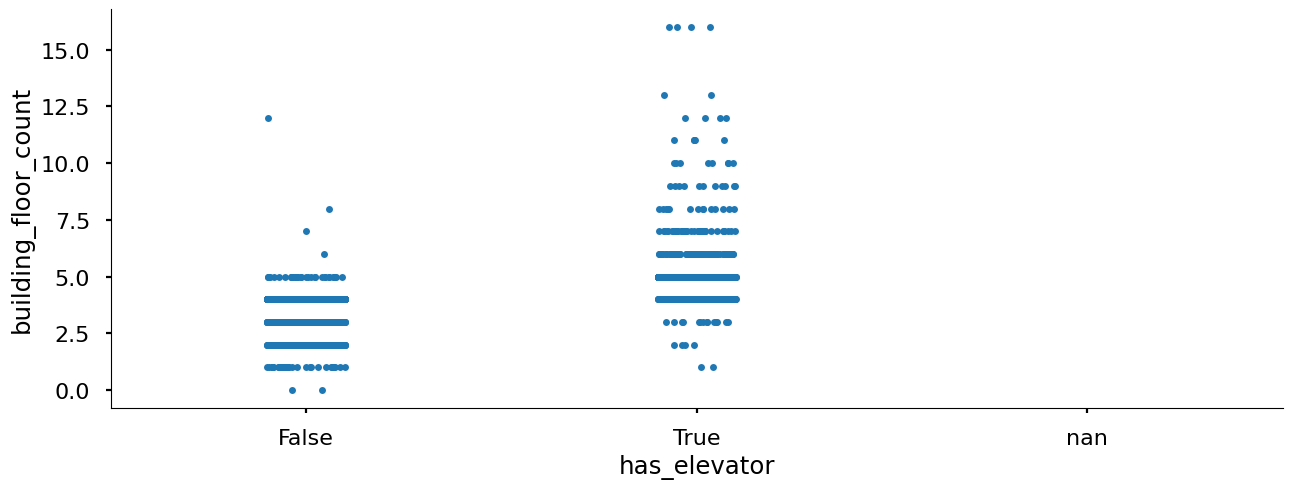

In [332]:
"""building floor count - has elevator relationship	"""
bfc_he=home_orig[["has_elevator","building_floor_count"]]
bfc_he.dropna()
g=sns.catplot(data=bfc_he,x="has_elevator",y="building_floor_count")
g.fig.set_size_inches(15,5)


In [333]:
"""find and remove invalid items"""
item_ids = np.unique(np.array(pointDf.item_id.values))

invalid_item_ids = [x for x in item_ids if x not in orig_item_ids]


print(f"found {len(invalid_item_ids)} ids that are not in property data")


pointDf.drop(pointDf[pointDf.item_id.isin(
    invalid_item_ids)].index, inplace=True)
pointDf.reset_index(drop=True, inplace=True)

# display(orig_item_ids)
# display(home_orig[np.where(home_orig.item_id.isin(item_ids)==False)])


found 2 ids that are not in property data


In [334]:
point_matrix = pointDf.values

user_id_nums={}
user_id_nums_rev={}
item_id_nums={}
item_id_nums_rev={}
for index,row in list(enumerate(point_matrix)):
    user_id=row[0]
    item_id=row[1]
    point=row[2]
    if user_id_nums.get(user_id) ==None:
        user_id_nums[user_id]=len(user_id_nums.keys())
        user_id_nums_rev[user_id_nums[user_id]]=user_id
    if item_id_nums.get(item_id) ==None:
        item_id_nums[item_id]=len(item_id_nums.keys())
        item_id_nums_rev[item_id_nums[item_id]]=item_id
        
points_train, points_test = train_test_split(point_matrix, test_size=0.2)
print(points_train.shape)
print(points_test.shape)


(76998, 3)
(19250, 3)


In [335]:
input_cols = ["deposit", "monthly_rent", "room_qty", "unit_area", "has_elevator",
              "build_floor_count", "unit_floor", "has_storage", "property_age"]
homes.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,34,1.0,42,0,3.000000,0.0,1,23.0
1,72000000.0,4320000,102,2.0,116,1,3.970741,1.0,1,16.0
2,50400000.0,1440000,115,1.0,74,0,2.000000,0.0,1,19.0
3,36000000.0,864000,100,1.0,60,1,3.970741,2.0,0,6.0
4,28800000.0,1296000,74,1.0,45,1,3.970741,1.0,1,4.0


In [336]:
"""get top 10 house by sum of point"""

'get top 10 house by sum of point'

In [337]:
def get_items_point_by_user(point_matrix, user_id):
    "all user id"
    y = point_matrix[:, 0]
    # get rows where user_id == input user_id
    filtered = point_matrix[np.where(y == user_id)]
    item_ids = filtered[:, 1].flatten()
    points = filtered[:, 2].flatten()
    return (item_ids, points)


In [338]:
"""train decision tree"""
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

users=point_matrix[:,0]
mu = np.zeros((len(users),))
normalized_points=point_matrix.copy()
for n in users:            # row indices of ratings made by user n
   ids = np.where(users == n)[0]
   item_points =point_matrix[ids, 2]
   # avoid zero division
   uid_numeric=user_id_nums[n]
   mu[uid_numeric] = np.mean(item_points) if ids.size > 0 else 0
   normalized_points[ids, 2] = item_points - mu[uid_numeric]


In [339]:

unique_user_id_train = np.unique(points_train[:, 0])
unique_user_id_test = np.unique(points_test[:, 0])

n_users = len(unique_user_id_train)
dt_trained_models={}
threshold=0
for uid in unique_user_id_train:
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        normalized_points,uid)
    
    # print(f"len id {len(ids)} len ponit {len(points>threshold)}")
    # if len(ids)==17:
    #     print("asd")
  

    clf = DecisionTreeClassifier(max_depth=3)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    if len(Xhat) ==0:
        continue;
    clf.fit(Xhat, points>threshold)
    
    dt_trained_models[uid]=clf


# Eval Decision tree

In [357]:
test_lab=[]
test_pred_decision_tree=[]
for uid in unique_user_id_test:
    #print(f"start training for user: {unique_user_id_train[n]}")
        # uid=56
    ids, points = get_items_point_by_user(points_test, uid)


    # x_test_dt=home[home_orig.item_id.isin(ids)]
    if dt_trained_models.get(uid) == None:
        continue
    selected_model=dt_trained_models[uid]
    predicted=selected_model.predict(home[home_orig_cleaned.item_id.isin(ids)])
    test_lab.extend(predicted)
    test_pred_decision_tree.extend(points>threshold)

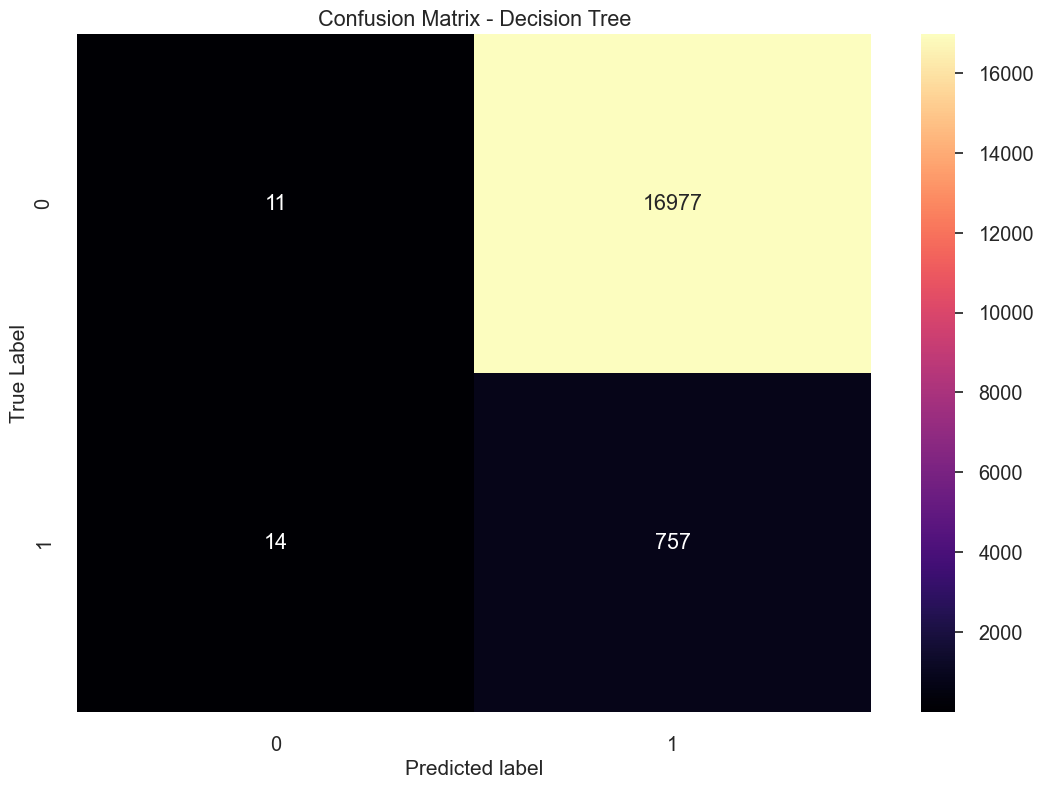

<Figure size 1000x700 with 0 Axes>

In [359]:

labels=["not like","like"]
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
# ax.set_yticklab/els(list(labels), rotation = 0)
plt.show()

In [360]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

       False       0.44      0.00      0.00     16988
        True       0.04      0.98      0.08       771

    accuracy                           0.04     17759
   macro avg       0.24      0.49      0.04     17759
weighted avg       0.42      0.04      0.00     17759



In [ ]:
uid="630a783f-f91a-4322-8c82-4a25c92f05d8"
# uid=56
ids, points = get_items_point_by_user(points_test, uid)


# x_test_dt=home[home_orig.item_id.isin(ids)]

selected_model=dt_trained_models[uid]
predicted=selected_model.predict(home)
print(predicted)

[False False False ... False False False]


In [ ]:
"""train ridge model"""
from sklearn.linear_model import Ridge
from sklearn import linear_model


unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)

d = home.shape[1]  # data dimension
W = np.zeros((d, n_users))
b = np.zeros((1, n_users))

for n in range(n_users):
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        points_train, unique_user_id_train[n])

    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    clf.fit(Xhat, points)
    trained_weight = clf.coef_
    trained_b = clf.intercept_
    W[:, n] = trained_weight
    b[0, n] = trained_b
    # if len(ids) > 10:
    #     # n_house x 2
    #     print(Xhat.dot(trained_weight) + trained_b)


17      23.823092
340     22.501637
404     23.637643
668     55.081640
1190    17.587348
1249    21.993165
1364    22.850325
1422    16.148129
1519    19.088663
1748    19.210918
1846    26.109976
2262    18.360283
2794    18.941272
2834    12.609438
3625    22.056470
dtype: float64
307     20.0
769     20.0
1538    20.0
1543    20.0
1646    20.0
1648    20.0
2527    20.0
2721    20.0
2809    20.0
2882    20.0
3394    20.0
3439    20.0
4263    20.0
dtype: float64
11      24.132988
54      24.960250
62      18.562642
93      21.584181
271     23.165720
          ...    
4680    23.838309
4807    19.101993
4834    19.688942
4899    17.936186
4901    18.477805
Length: 83, dtype: float64
330     20.0
404     20.0
476     20.0
502     20.0
511     20.0
1203    20.0
1239    20.0
1471    20.0
1495    20.0
1502    20.0
1602    20.0
1877    20.0
2010    20.0
2138    20.0
2207    20.0
2442    20.0
2471    20.0
2529    20.0
2638    20.0
2639    20.0
2671    20.0
2718    20.0
2768    20.0
2772   

In [ ]:
#cols: users
#rows: houses
# value: predicted point
Yhat = np.array(home.dot(W) + b)
print(Yhat.shape)
print(home.shape)
print(W.shape)


(4928, 15434)
(4928, 10)
(10, 15434)


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


class CollaborativeFiltering(object):
    def __init__(self, Y_data, k, sim_func=cosine_similarity,item_based=False):
        points_copy=Y_data.copy()
        for index,row in list(enumerate(Y_data)):
            point=row[2]
            if not item_based:
                user_id=row[0]
                item_id=row[1]
                points_copy[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
            else:
                user_id=row[1]
                item_id=row[0]
                points_copy[index]=[item_id_nums[item_id],user_id_nums[user_id],point]      

        self.Y_data = points_copy  # a 2d array of shape (n_users, 3)
        # each row of Y_data has form [user_id, item_id, rating]
        self.k = k  # number of neighborhood
        self.sim_func = sim_func  # similarity function, default: cosine_similarity
        self.Ybar = None  # normalize data
        self.n_users = len(self.Y_data[:,0])  # number of users
        self.n_items = len(self.Y_data[:,1])  # number of items

    def fit(self):

        # normalized Y_data -> Ybar
        users = self.Y_data[:, 0]  # all users - first column of Y_data
        self.Ybar = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))
        for n in users:
            # row indices of ratings made by user n
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all items rated by user n
            item_ids = self.Y_data[ids, 1]
            # ratings made by user n
            ratings = self.Y_data[ids, 2]
            # avoid zero division
            self.mu[n] = np.mean(ratings) if ids.size > 0 else 0
            self.Ybar[ids, 2] = ratings - self.mu[n]
            # form the rating matrix as a sparse matrix.
            # see more: https://goo.gl/i2mmT2
        data=np.array(self.Ybar[:,2],dtype="float64")
        row=np.array(self.Ybar[:,1],dtype="int64")
        col=np.array(self.Ybar[:,0],dtype="int64")

        self.Ybar = sparse.coo_matrix((data,
                                        (row, col)), (self.n_items, self.n_users)).tocsr()
        self.S = self.sim_func(self.Ybar.T, self.Ybar.T)

    def pred(self, u, i):
        """ predict the rating of user u for item i"""
        # find item i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        # all users who rated i
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)
        # similarity of u and users who rated i
        sim = self.S[u, users_rated_i]
        # most k similar users
        nns = np.argsort(sim)[-self.k:]
        nearest_s = sim[nns]  # and the corresponding similarities
        # the corresponding ratings
        r = self.Ybar[i, users_rated_i[nns]]
        eps = 1e-8  # a small number to avoid zero division
        return (r*nearest_s).sum()/(np.abs(nearest_s).sum() + eps) + self.mu[u]


In [ ]:
#eval func
def eval_cf(cf_model,test_set,item_based=False):
    n_tests = test_set.shape[0]
    real_points=np.array([],dtype="float64")
    pred_points=np.array([],dtype="float64")
    SE = 0 # squared error
    for n in range(n_tests):
        if not item_based:
            pred = cf_model.pred(user_id_nums[test_set[n, 0]], item_id_nums[test_set[n, 1]])
        else:
            pred = cf_model.pred(item_id_nums[test_set[n, 0]], user_id_nums[test_set[n, 1]])
        real_points=np.append(real_points,test_set[n, 2])
        pred_points=np.append(pred_points,pred)

    RMSE=mean_squared_error(
            pred_points,real_points, squared=False)
    MSE=mean_squared_error(
            pred_points,real_points)
    MAE=mean_absolute_error(pred_points,real_points)
    return  RMSE, MSE,MAE

In [ ]:
def get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig_cleaned.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    print("Top points: ",pred_points[top_item_indexes])
    return home_orig_cleaned.iloc[top_item_indexes].item_id

In [ ]:
#user-based
user_based_cf = CollaborativeFiltering(points_train, k = 3)
user_based_cf.fit()



In [ ]:
user_based_cf_recommedation_result=get_top_items(user_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=False)
print(user_based_cf_recommedation_result)


Top points:  [248.92 252.16 256.61 262.4  358.4  408.48 478.81]
3443    f0b11f3b-6b6f-433b-b55d-4d795355b48f
540     6190bb27-d2b7-4eb5-8f9d-3b8d15ed5f8b
2031    730c20b1-d65f-4c7b-b3f4-10fc45f1391b
2100    866b96e8-8175-496b-b2b4-6597be373bfb
3313    fb03bfff-bb94-482b-8468-4cbb185d257e
3270    3123bb9b-8280-43b3-b67f-e9057de42f0d
1451    302584be-458d-4e41-8492-bb4e41577cd2
Name: item_id, dtype: object


In [ ]:
RMSE,MSE,MAE=eval_cf(user_based_cf,points_test)
print(f"User-based CF, RMSE = {RMSE}\n")
print(f"User-based CF, MSE = {MSE}\n")
print(f"User-based CF, MAE = {MAE}\n")


User-based CF, RMSE = 20.59813475387004

User-based CF, MSE = 424.28315533858864

User-based CF, MAE = 6.237918605783152



In [ ]:
#item-based
points_train_ib=points_train[:,[1,0,2]]
points_test_ib=points_test[:,[1,0,2]]

item_based_cf=CollaborativeFiltering(points_train_ib,k=3,item_based=True)
item_based_cf.fit()




In [ ]:

RMSE,MSE,MAE=eval_cf(item_based_cf,points_test_ib,item_based=True)
print(f"Item-based CF, RMSE = {RMSE}\n")
print(f"Item-based CF, MSE = {MSE}\n")
print(f"Item-based CF, MAE = {MAE}\n")


Item-based CF, RMSE = 21.631248170461326

Item-based CF, MSE = 467.91089741208646

Item-based CF, MAE = 5.9883061838297795



In [ ]:
item_based_cf_recommedation_result=get_top_items(item_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=True)
print(item_based_cf_recommedation_result)

Top points:  [125.   130.   209.12 200.   179.17 150.   200.  ]
3970    1e79b347-ed95-4040-b8d1-9e65c34cbe3b
3636    5eb92921-86b2-403c-8e74-7f681bc15b26
133     66ccecee-0100-4004-945f-84685d83c01f
918     76c47d0b-fce7-4d00-87d1-8c2e2db0b92d
1451    302584be-458d-4e41-8492-bb4e41577cd2
3567    e0dbfb16-5e50-41b0-b97c-318eb65998fc
3227    3db78bf2-bff2-42b1-8bb3-69b0b692738d
Name: item_id, dtype: object
